<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Ольга! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
</br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

<font color='blue'>Ответы на мои комментарии лучше тоже помечать.

Например:</font><font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

 # Проект: Обучение с учителем: качество модели

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

##  План работы

Ознакомиться с данными, выявить пропуски и аномалии.

Выполнить предобработку данных: переименование столбцов, замена типов данных, заполнение пропусков, устранение дубликатов

Выполнить исследовательский анализ: построить графики, найти аномалии, понять как распределены данные. Учесть, что данные есть категориальные и количественные. 

Объединить таблицы.

Выполнить корреляционный анализ: изучить взаимосвязь между данными, построить графики, сделать выводы.

Подготовить данные для пайплайна, обучить модели, подобрать гиперпараметры, выявить лучшую модель.

Оценить важность признаков.

Сегментировать клиентов.

Оформить проект и сделать выводы на каждый шаг

In [1]:
pip install phik


Note: you may need to restart the kernel to use updated packages.


In [2]:
# обновление, иначе получаю кучу ошибок
!pip install scikit-learn --upgrade

In [3]:
# обновление, иначе получаю кучу ошибок
!pip install matplotlib==3.5.1

In [1]:
!pip install shap --upgrade

In [2]:
pip list

Package                           Version
--------------------------------- -------------------
absl-py                           1.2.0
alembic                           1.6.5
anyio                             3.2.1
argon2-cffi                       20.1.0
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
blinker                           1.4
blis                              0.7.8
branca                            0.5.0
brotlipy                          0.7.0
cachetools                        5.2.0
catalogue                         2.0.8
catboost                          1.0.3
certifi                           2022.6.15
certipy                           0.1.3
cffi                              1.14.5
chardet             

##  Шаг 1 Загрузка данных  

In [5]:
# импортируем нужные нам библиотеки
import pandas as pd
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_absolute_error,
    mean_squared_error
)
import shap
import phik
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix,f1_score
# загружаем нужные классы
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# класс для работы с пропусками
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# отключаем предупреждения
import warnings
warnings.filterwarnings("ignore")

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [6]:
# читаем файлы
# не забываем что тут разделитель - ;
mf = pd.read_csv('/datasets/market_file.csv')
mm = pd.read_csv('/datasets/market_money.csv')           
mt = pd.read_csv('/datasets/market_time.csv')  
m = pd.read_csv('/datasets/money.csv', delimiter=';', decimal=',')  

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Обрати внимание, из-за неправильного указания разделителя дроби, некоторые признаки загружены в некорректном типе данных.~~</font>

<br/>
<div class="alert alert-info">
исправлено
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

In [7]:
def df_info(df):
    # размер датасета
    print('Размер датафрейма:',df.shape)
    # посмотрим первые 5 строк данных
    print('Первые 5 строк:')
    display(df.head())
    print('Последние 5 строк:')
    display(df.tail())
    # тип данных
    print('Описательные статистики:')
    display(df.describe())
    print('Типы данных')
    display(df.info())

In [8]:
print(df_info(mf),df_info(mm),df_info(mt),df_info(m))

Размер датафрейма: (1300, 13)
Первые 5 строк:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Последние 5 строк:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7
1299,216647,Прежний уровень,премиум,да,4.0,5,906,0.94,Техника для красоты и здоровья,4,5,3,12


Описательные статистики:


,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса    

None

Размер датафрейма: (3900, 3)
Первые 5 строк:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Последние 5 строк:


,id,Период,Выручка
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0
3899,216647,текущий_месяц,4448.3


Описательные статистики:


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

Размер датафрейма: (2600, 3)
Первые 5 строк:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Последние 5 строк:


,id,Период,минут
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10
2599,216647,предыдцщий_месяц,15


Описательные статистики:


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

Размер датафрейма: (1300, 2)
Первые 5 строк:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Последние 5 строк:


,id,Прибыль
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03
1299,216647,3.28


Описательные статистики:


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

None None None None


Мы прочитали данные, посмотрели на 5 первых и последних строк в датасетах. Получили описательные статистики.

   На данном этапе видно, что пропусков в данных нет, типы данных соответствуют.
   
   Исправим и наименования столбцов: они слишком объемные и не соответствуют змеиному регистру.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Первичный осмотр проведен.</font>

 ## Шаг 2. Предобработка данных

In [9]:
#перевод в нижний регистр
mf.columns = mf.columns.str.lower()
mm.columns = mm.columns.str.lower()
mt.columns = mt.columns.str.lower()
m.columns = m.columns.str.lower()

In [10]:
# переименуем столбцы
mf = mf.rename(columns = {'id':'ид'})
mf.columns = mf.columns.str.replace(' ', '_')
mm = mm.rename(columns = {'id':'ид'})
mt = mt.rename(columns = {'id':'ид'})
m = m.rename(columns = {'id':'ид'})


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Пробелы можно заменить прочерком методом replace.</font>

<br/>
<div class="alert alert-info">
учтено
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

In [11]:
# взглянем на уникальные значения в категориальных столбцах
for i in mf.iloc[:, [1,2,8]].columns:
    print('Столбец',i,':')
    print( mf[i].value_counts())

Столбец покупательская_активность :
Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64
Столбец тип_сервиса :
стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64
Столбец популярная_категория :
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64


In [12]:
# исправим неверные данные.заменим  стандартт на стандарт.
mf['тип_сервиса'] = mf['тип_сервиса'].str.replace('стандартт','стандарт')
#  исправим граматическую ошибку..
mf['популярная_категория'] = mf['популярная_категория'].str.replace('Косметика и аксесуары','Косметика и аксессуары')


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

In [13]:
print( mm['период'].value_counts())

текущий_месяц          1300
предыдущий_месяц       1300
препредыдущий_месяц    1300
Name: период, dtype: int64


In [14]:
print(mt['период'].value_counts())

текущий_месяц       1300
предыдцщий_месяц    1300
Name: период, dtype: int64


In [15]:
# исправим опечатку
mt['период'] = mt['период'].str.replace('предыдцщий_месяц','предыдущий_месяц')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

 Проверим дубли


In [16]:
l = [mf, mm, mt, m]
for i in l:
     print( 'Количество дублей в датасете:', i.duplicated().sum())

Количество дублей в датасете: 0
Количество дублей в датасете: 0
Количество дублей в датасете: 0
Количество дублей в датасете: 0


На данном шаге я перевела все названия столбцов в нижний регистр, переименовала столбцы в соответствие с змеиным регистром и постаралась убрать длинные названия столбцов.

Пропусков в данных нет.

В датасетах  с типами данных все в порядке, менять не требуется.

 Я просмотрела содержимое категориальных столбцов и исправила значение с опечаткой (например, столбец тип сервиса).

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

 ## Шаг 3. Исследовательский анализ данных

In [17]:
# запишем количественные признаки датасета market_file
mf_num_col_names = [ 'маркет_актив_6_мес',  'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит',
                    'неоплаченные_продукты_штук_квартал','ошибка_сервиса','страниц_за_визит'  ]
#отсортируем и транспонируем для удобства
mf[mf_num_col_names].describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00


Первично данные кажутся нормальными. Но стоит обратить внимаение, что есть клиенты с долей акционных покупок - 0.99

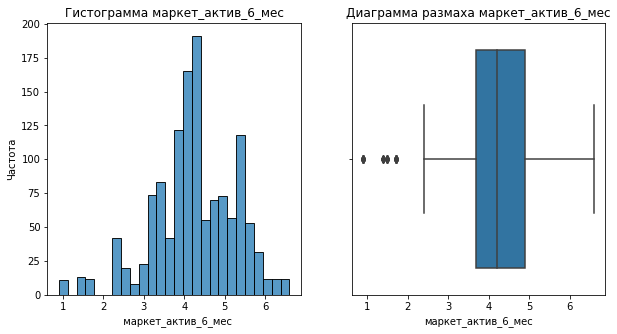

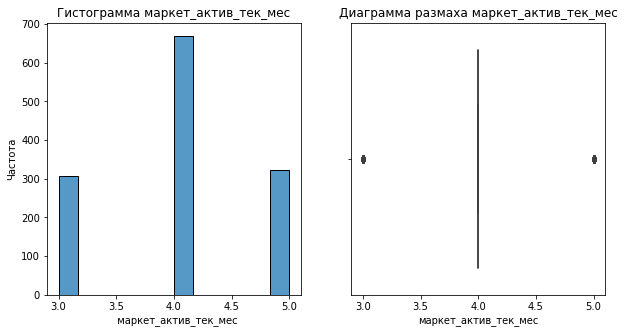

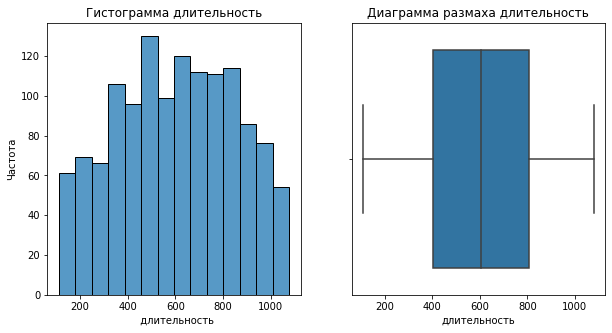

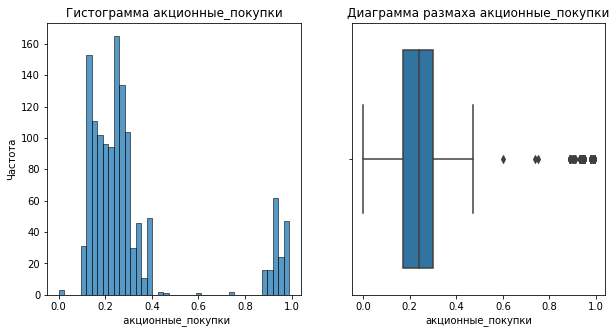

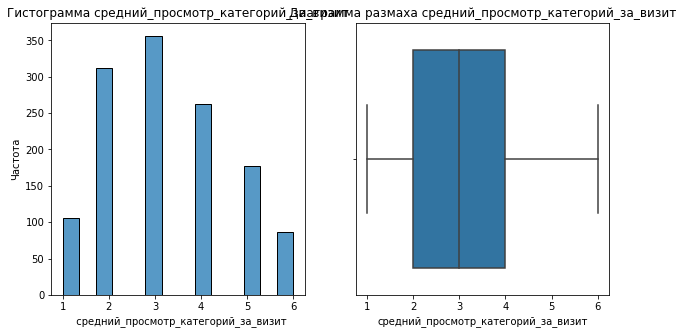

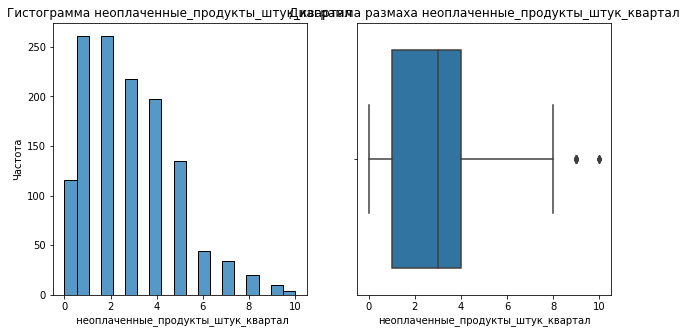

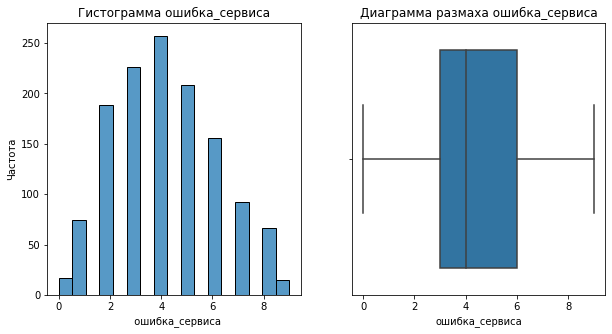

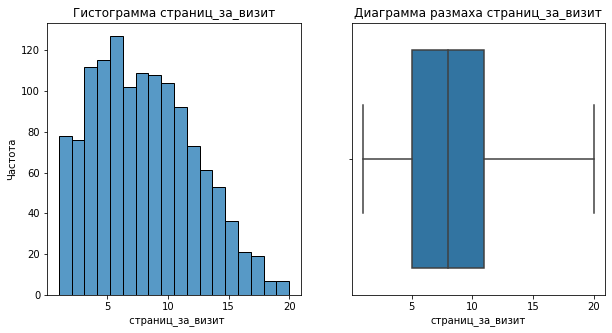

In [18]:
#создание функции для построения гистограммы диаграммы размаха для столбцов с количественными признаками
def hist_box(data, column):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'  {column}')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    sns.histplot(data[column])
    plt.subplot(1, 2, 2)
    plt.xlabel(f'  {column}')
    plt.title(f'Диаграмма размаха {column}')
    sns.boxplot(x=data[column],)
#построение распределений количественных признаков датасета market
for name in mf_num_col_names:
    hist_box(mf, name)

маркет_актив_6_мес : распределение в целом похоже на нормальное, но на диаграмме размаха видим, что есть маленькие значения.

маркет_актив_тек_мес : выглядит так что всех пользователей можно разбить на три категории: 3,4 и 5

длительность: нормальное распределение

акционные покупки: имеет два пика, есть ряд покупателей которые покупают почти все по скидке и ряд покупателей чьи акционные покупки составляют 0,15 - 0,4

средний_просмотр_категорий_за_визит:  нормальное распределение

неоплаченные_продукты_штук_квартал: скошенное влево нормалльное распределение

ошибка сервиса: нормальное распределение

страницы за визит: скошенное влево распределение







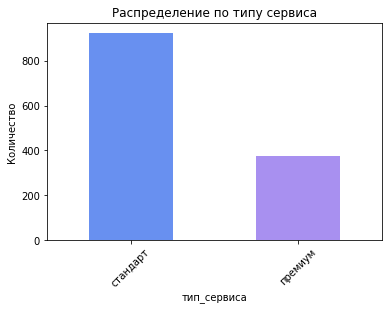

In [19]:
# тип_сервиса
fig, ax = plt.subplots()

colors = ['#6890F0','#A890F0']
mf['тип_сервиса'].value_counts().plot.bar(color=colors, ax=ax);
plt.title('Распределение по типу сервиса')
plt.xlabel('тип_сервиса')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

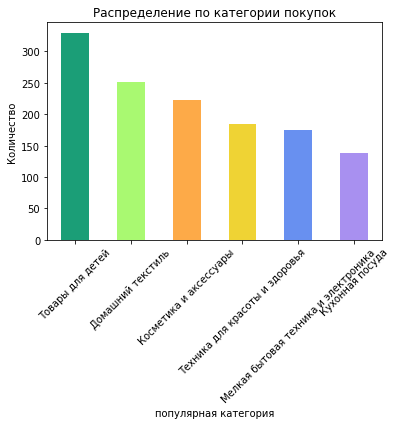

In [20]:
# тип_пастбища
fig, ax = plt.subplots()

colors = ['#1b9e77', '#a9f971', '#fdaa48','#efd334','#6890F0','#A890F0']
mf['популярная_категория'].value_counts().plot.bar(color=colors, ax=ax);
plt.title('Распределение по категории покупок')
plt.xlabel('популярная категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

In [21]:
mm['выручка'].describe().T

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

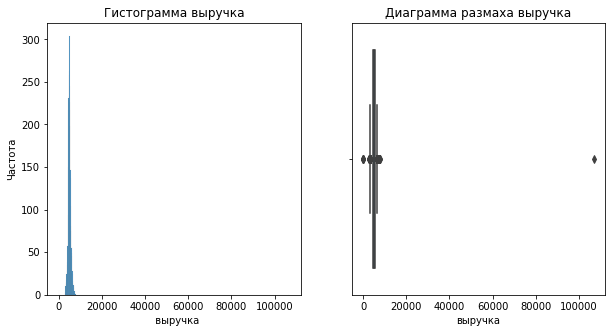

In [22]:
hist_box(mm, 'выручка');


Есть выброс на сумму более 100000. Избавимся от него, поскольку среднее значение составляет около 5000.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

In [23]:
mm = mm[mm['выручка'] < 100000]

In [24]:
mt['минут'].describe().T

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

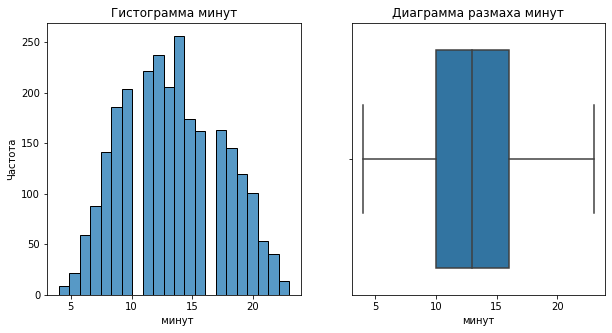

In [25]:
hist_box(mt, 'минут');

Нормальное распределение

In [26]:
m['прибыль'].describe().T

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

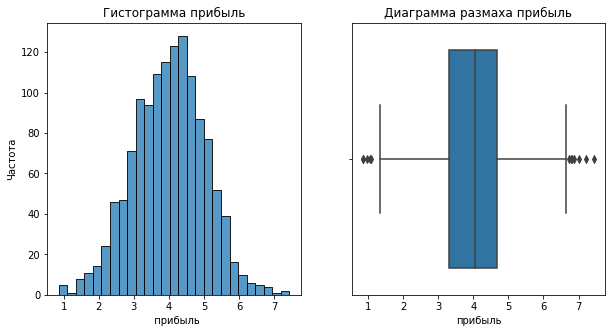

In [27]:
hist_box(m, 'прибыль');

Нормальное распределение

Есть выбросы, как справа так и слева. но я думаю, их можно считать нормальынми, так как прибыль с покупателя может быть минимальной и очень большой 

Для поиска активных клиентов за три месяца для начала мы сгруппирууем данные таблицы market money по ид покупаетля и фильтруем по выручке (больше нуля)

Получим ид таикх пользователей и запишем уникалные значения

In [28]:

active = mm.groupby('ид').filter(lambda x: (x['выручка'] > 0).all())

mf = mf[mf['ид'].isin(active['ид'].unique())]
mf.shape

(1297, 13)

имеем 1297 уникальных клиентов, выручка от которых больше нуля,  теперь мы соотнесли нашу новую информацию с таблицей, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении - market file.

 Вывод: я  Провела исследовательский анализ данных из каждой таблицы и отфильтровала покупателей, совершавших покупки в последие три месяца. Активных пользователей мы выявили благодаря таблице  market money.
 
 Также мы обнаружили и устранили выброс в столбце "выручка" таблицы market_money.
 
 Проверили распределение данных: большинство  данных имеет нормальное распределение (ошибка сериса, средний_просмотр_категорий_за_визит).
 
 Выяснили, что клиентов с стандартным сервисом более чем в два раза превосходят премиумов.
 
 Чаще всего покупают товары для детей и домашний текстиль, реже - Кухонная посуда 
 
 
 

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно удалить пользователей без покупок хотя бы в одном из трёх месяцев, у них активность менее трёх месяцев. Это можно проявить по выручке.~~</font>
```markdown
Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.
```

<br/>
<div class="alert alert-info">
исправлено
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Неактивные удалены 👌</font>

##  Шаг 4. Объединение таблиц

In [29]:
mm['ид'].unique()

array([215348, 215349, 215350, ..., 216645, 216646, 216647])

In [30]:
mf.columns

Index(['ид', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [31]:
#  сводная таблица 

mm_pivot = mm.pivot_table(index=['ид'], columns=["период"])
mm_pivot.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
mm_pivot['ид'] = mm_pivot.index

mt_pivot = mt.pivot_table(index=['ид'], columns=["период"])
mt_pivot.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
mt_pivot['ид'] = mt_pivot.index

m_all = mf.join(mm_pivot, on='ид', lsuffix="_left", rsuffix="_выручка")
m_all = m_all.rename(columns={'ид_left':'ид'})
m_all = m_all.join(mt_pivot, on='ид', lsuffix="_left", rsuffix="_минут")
m_all = m_all.rename(columns={'ид_left':'ид'})
m_all = m_all.drop(['ид_выручка', 'ид_минут'], axis=1)
m_all.head(5)
    

,ид,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично!  Развернули таблицы.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

In [32]:
#  проверим дубли
print(m_all.duplicated().sum())


0


In [33]:
#  проверим  пропуски
print(m_all.isna().sum())

ид                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  1
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64


In [34]:
# удалим 1 пропуск 
m_all = m_all.dropna()

In [35]:
  # проверим тип данных
display(m_all.info());

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ид                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

None

  Вывод: Данные из датафреймов market_file, market_money и market_time были объединены в одну таблицу по общему столбцу - 'id' пользователя, тип соединения - inner. Размерность, пропуски и типы данных были проверены - замечаний нет.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

 ## Шаг 5. Корреляционный анализ

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Корреляция Пирсона работает только для нормально распределённых непрерывных переменных.~~ </font>

<br/>
<div class="alert alert-info">
убрала неподходящий график
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

Проще всего вызвать метод phik_matrix, чтобы построить матрицу корреляций для всех входных признаков в датасете:

interval columns not set, guessing: ['ид', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


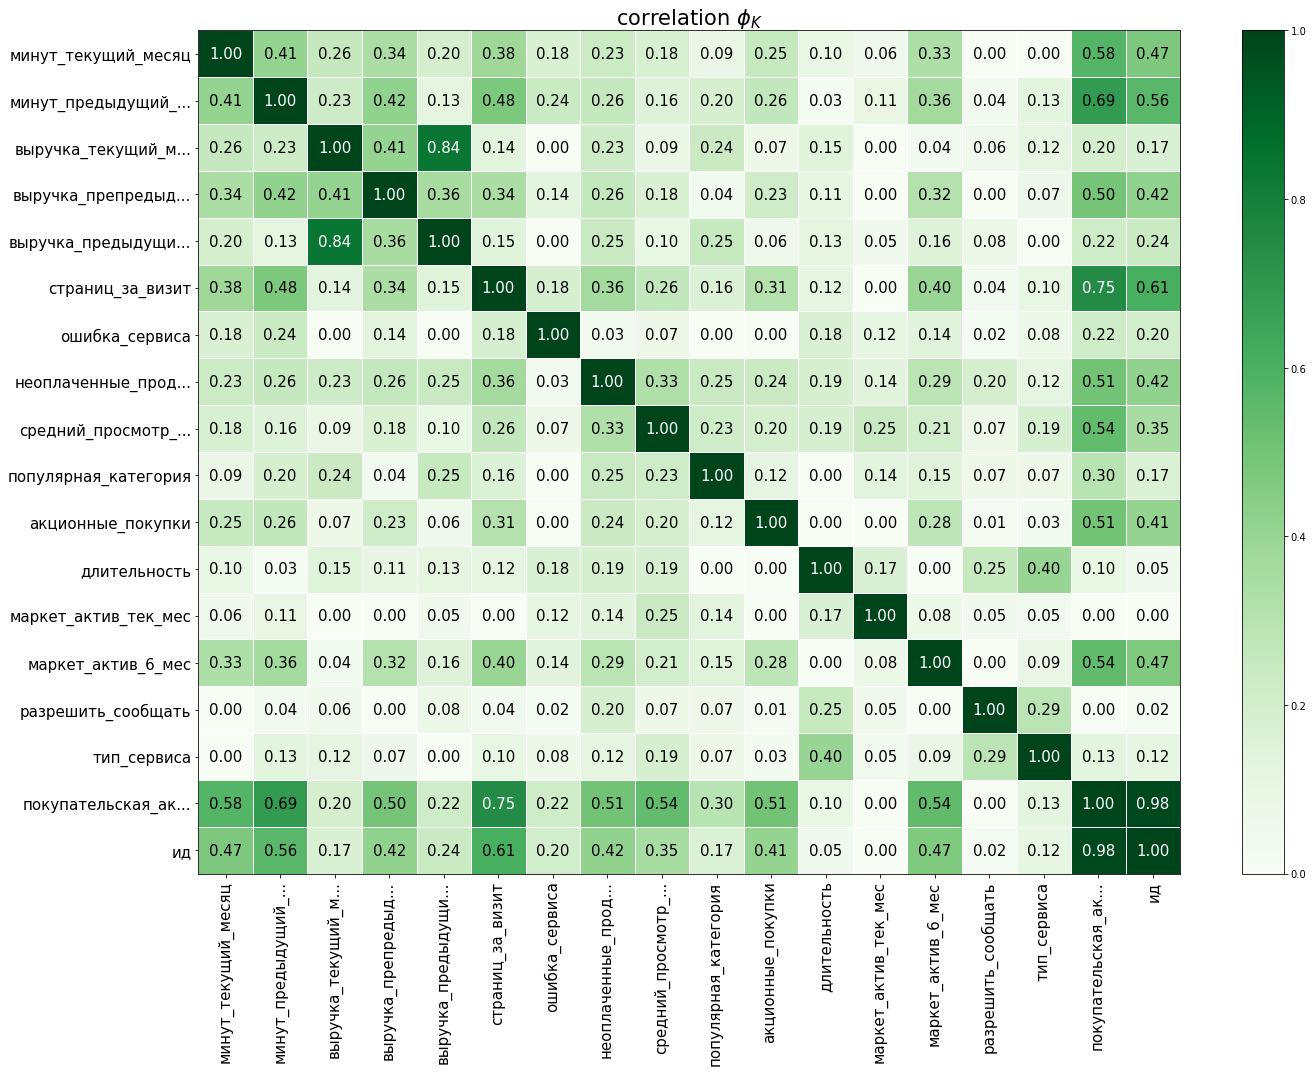

In [36]:

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(m_all)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Все импорты должны быть в первой ячейке татрадки, что бы сразу были видны все зависимости кода.</font>

<br/>
<div class="alert alert-info">
учтено</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

 Построим отдельно графики для целевого признака

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


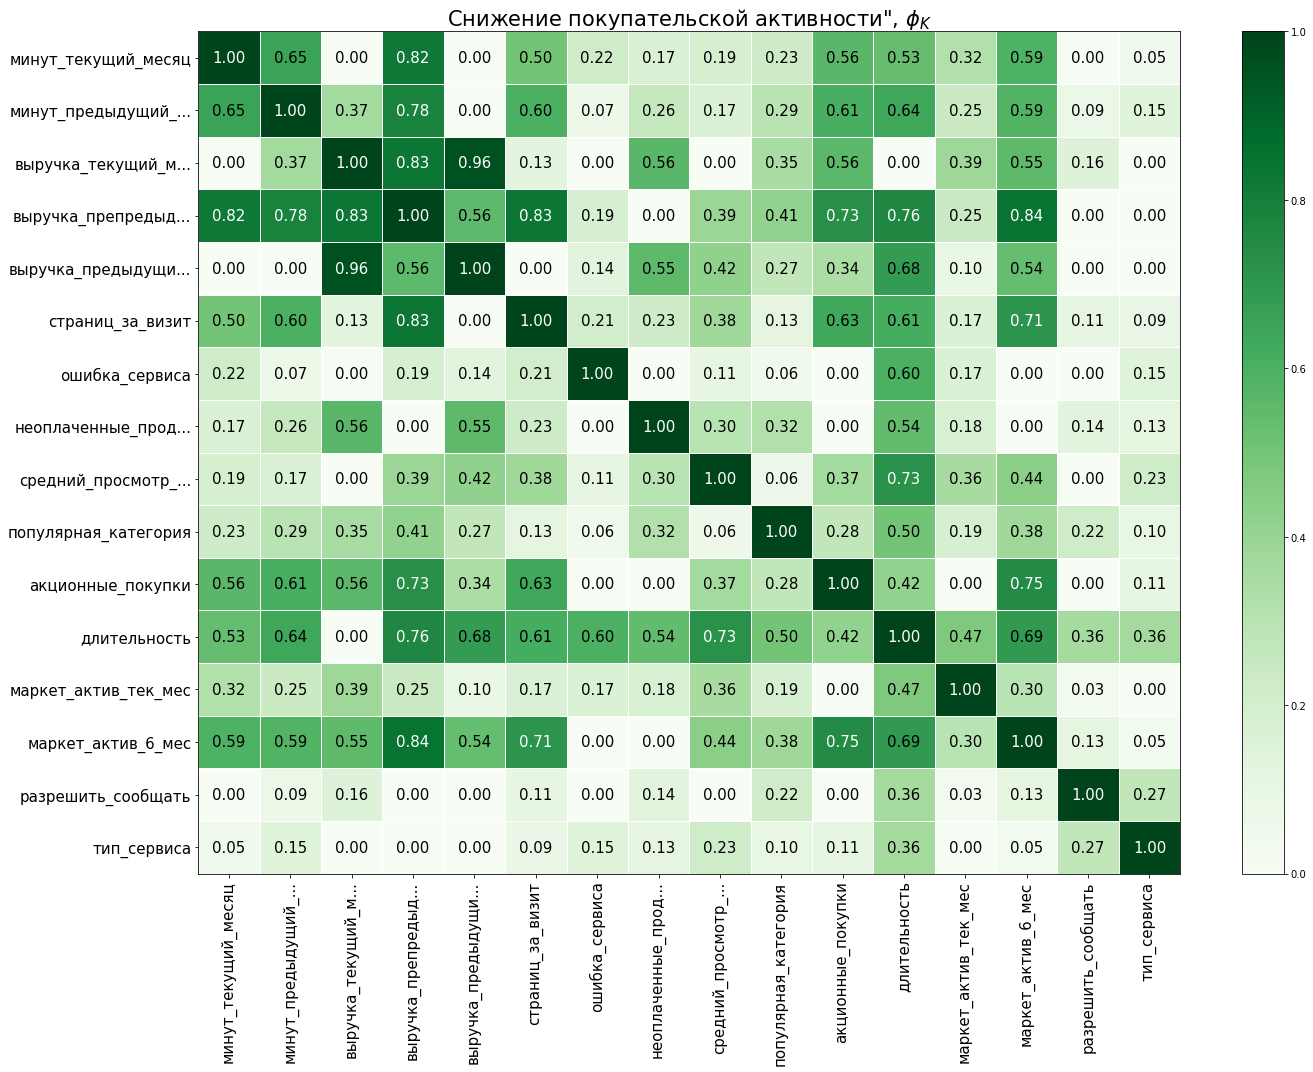

In [37]:
phik_overview_desc = phik_matrix(m_all[m_all['покупательская_активность']=='Снизилась'].drop(['ид', 'покупательская_активность'],
                                                                                             axis=1), bins=100)

plot_correlation_matrix(
    phik_overview_desc .values,
    x_labels=phik_overview_desc.columns,
    y_labels=phik_overview_desc.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Снижение покупательской активности", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


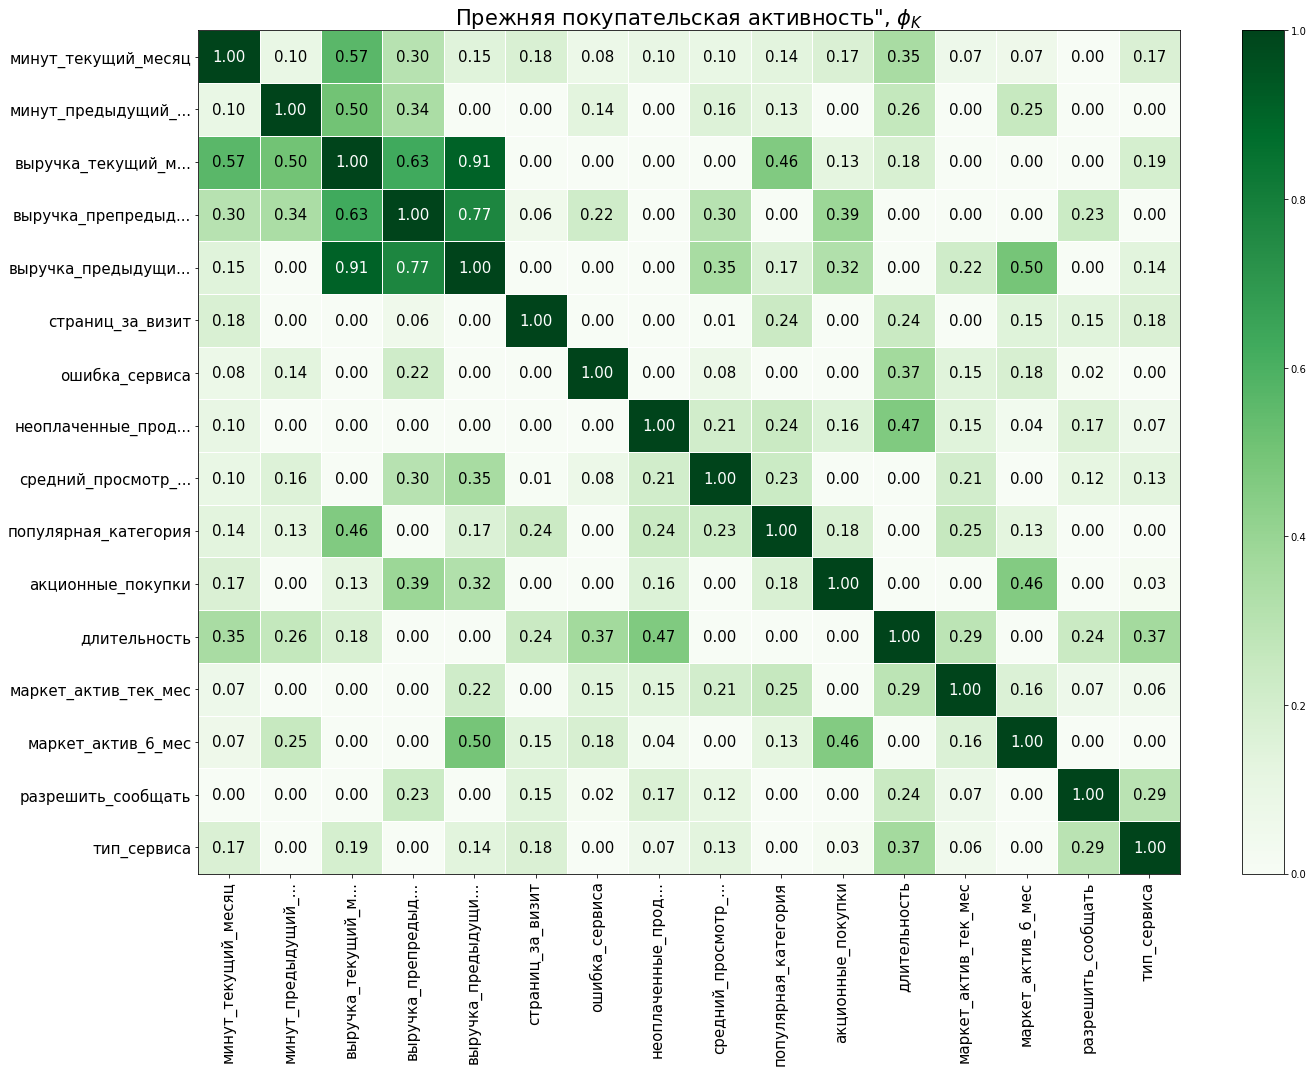

In [38]:
phik_overview_const = phik_matrix(m_all[m_all['покупательская_активность']=='Прежний уровень'].drop(['ид', 'покупательская_активность'],
                                                                                             axis=1), bins=100)

plot_correlation_matrix(
    phik_overview_const.values,
    x_labels=phik_overview_const.columns,
    y_labels=phik_overview_const.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Прежняя покупательская активность", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что есть группировка по таргету.</font>

Я построила графики корреляции для сниженной и неизменной покупательской активности. Видим, что на первый график имеет наиболее насыщенные зеленые цвета, значит корреляция признакв выше, чем для покупателей, чья активность осталась прежней.

Также избавимся от мультиколинеарности - ситуации когда признаки сильно зависят друг от друга. Для всех значений целевого признака  видим, что высокая зависимость у выручка_текущий_месяц и выручка_предыдущий_месяц(0.94 у первого графика, 0.91 у второго). Чтобы избавиться от мультиколинеарности надо удалить один из признаков. Удалим выручка_предыдущий_месяц и построим графики еще раз


In [39]:
 # удаляем столбец
m_all = m_all.drop('выручка_предыдущий_месяц', axis=1)

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


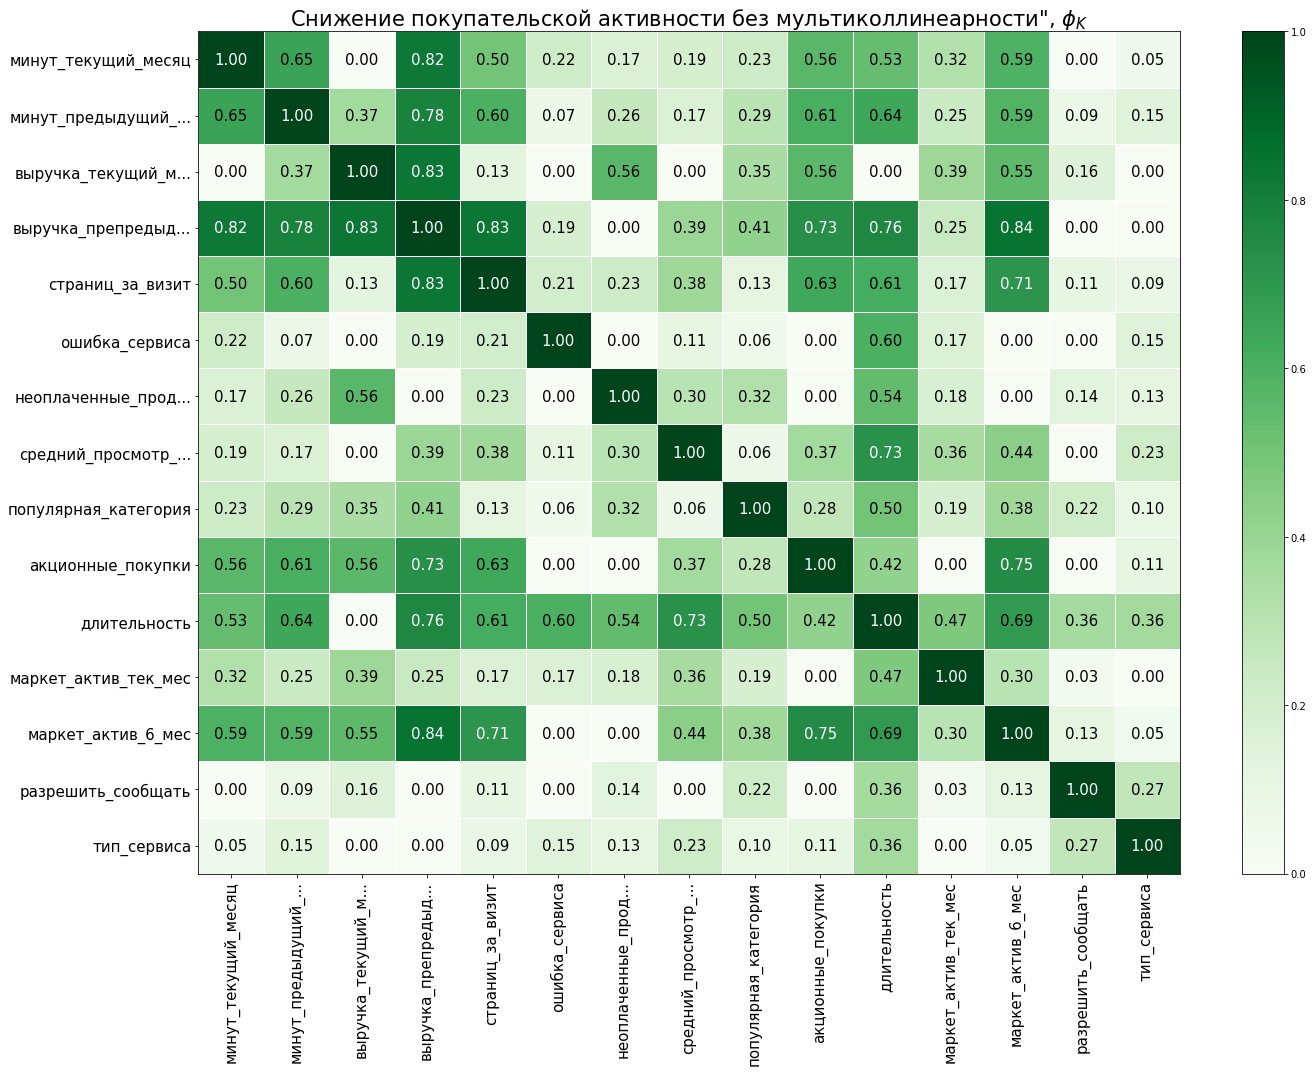

In [40]:
phik_overview_desc = phik_matrix(m_all[m_all['покупательская_активность']=='Снизилась'].drop(['ид', 'покупательская_активность'],
                                                                                             axis=1), bins=100)

plot_correlation_matrix(
    phik_overview_desc .values,
    x_labels=phik_overview_desc.columns,
    y_labels=phik_overview_desc.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Снижение покупательской активности без мультиколлинеарности", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


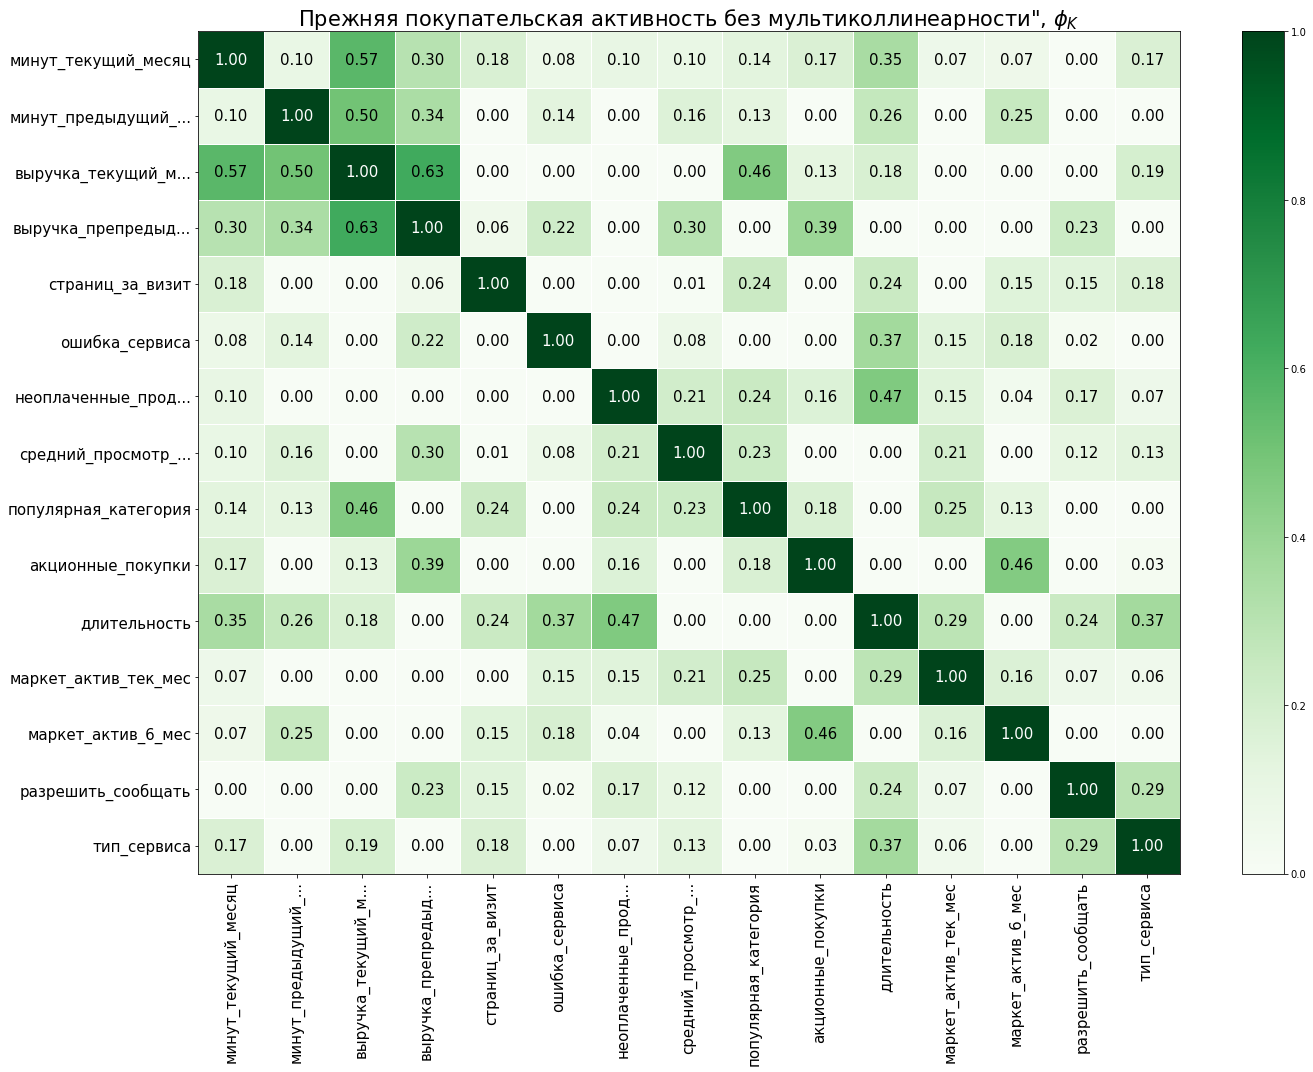

In [41]:
phik_overview_const = phik_matrix(m_all[m_all['покупательская_активность']=='Прежний уровень'].drop(['ид', 'покупательская_активность'],
                                                                                             axis=1), bins=100)

plot_correlation_matrix(
    phik_overview_const.values,
    x_labels=phik_overview_const.columns,
    y_labels=phik_overview_const.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Прежняя покупательская активность без мультиколлинеарности", $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

вывод:

была построена тепловая карта, но так как данный тип графиков не очень хорошо работает с категориальными данными мы использовали phik_matrix для построения наглядынх графиков.

Мы нашли и избавились от мультиколинеарности между признаками выручка_текущий_месяц и выручка_предыдущий_месяц. В дальнейшем такая сильная связь могла привести к неточным прогнозам модели.

Из графика видим, что сильнейшая связь целевого прризнака наблюдается с признаками страниц за визит и минут в предыдущем месяце. 

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

 ## Шаг 6. Использование пайплайнов

In [42]:

# введем константы
TEST_SIZE = 0.25
RANDOM_STATE = 42

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Не было же пропусков.</font>

<br/>
<div class="alert alert-info">
убрала излишний код 
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

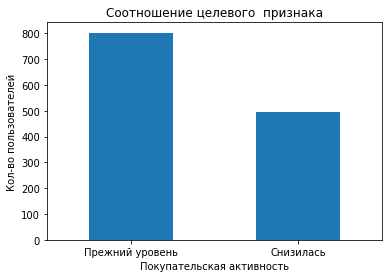

In [43]:
#  проверим дисбаланс классов по целевому признаку
m_all['покупательская_активность'].value_counts().plot(kind='bar')
plt.title('Соотношение целевого  признака')
plt.ylabel('Кол-во пользователей')
plt.xticks(rotation = 0)
plt.xlabel('Покупательская активность')
plt.show()

Раз в данных есть дисбаланс классов, нужно обязательно выполнить стратификацию по целевому признаку.

В этом случае тренировочные и тестовые выборки сохранят соотношение классов исходных данных, если при разбивке данных указать stratify=y.

Два  признака: 'популярная категория', 'разрешить_сообщать'— нужно кодировать с помощью OneHotEncoder.
Один признак: тип сервиса — нужно кодировать с помощью OrdinalEncoder.
Целевой признак — покуательская активность. Количественные признаки нужно масштабировать.

In [44]:
m_all.columns

Index(['ид', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_препредыдущий_месяц',
       'выручка_текущий_месяц', 'минут_предыдущий_месяц',
       'минут_текущий_месяц'],
      dtype='object')

In [45]:
df_full = m_all

In [46]:
X = df_full.drop(['ид','покупательская_активность'], axis=1)
y = df_full['покупательская_активность'] 
#кодирование целевого признака

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)
X_train.shape, X_test.shape

((972, 15), (324, 15))

In [47]:
X_train.shape, y_train.shape

((972, 15), (972,))

In [48]:
#для кодирование целевого признака


encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# создаём списки с названиями признаков

ohe_columns = ['популярная_категория', 'разрешить_сообщать']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
               'акционные_покупки', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_препредыдущий_месяц',
       'выручка_текущий_месяц', 'минут_предыдущий_месяц',
       'минут_текущий_месяц']
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='error'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors':range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            kernel='poly', probability= True
            )],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train_enc)

y_train_probas = randomized_search.predict_proba(X_train)
y_test_probas = randomized_search.predict_proba(X_test)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_enc, y_test_probas[:, 1])}')
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_params_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['популярная_категория',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),...
                                  

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> ~~Энкодер (LabelEncoder) можно обучать только на обучающих данных.\
Тестовую выборки только трансформируем.~~</font>

<br/>
<div class="alert alert-info">
исправлено
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~В SVC нужно передать аргумент probability= True. Что бы можно было работать с вероятностями, если модель выиграет.~~</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно аргументировать выбор метрики.~~</font>

<br/>
<div class="alert alert-info">
ROC-AUC полезна в ситуациях, где классы несбалансированы или когда важно оценивать производительность модели при различных уровнях порога классификации. Она позволяет сравнивать разные модели по их способности к классификации, не завися от конкретного порогового значения.
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~roc_auc нужно считать по вероятностям классов~~
```python
probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))
```
<font color='blue'>Самое подробное объяснение метрики, что я видел на русском языке, можно посмотреть здесь: https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок \
А внутри кросс-валидации мы просто указываем метрику ROC_AUC и там никаких вероятностей нам не нужно. Так как эта метрика не дифференцируема на всем промежутке (кажется, разрыв в нуле), то там разработчики кросс-валидации хитро меняют ее на эквивалент Gini, так как Gini = 2 ×AUC_ROC – 1 (можно почитать по ссылке выше)
</font>

<br/>
<div class="alert alert-info">
исправлено
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Модель показывает отличные результаты и работает подозрительно хорошо.

Лучшая модель - модель LogisticRegression с параметрами штрафа l1 .

Модель  работает на тренировочной выборке чуть хуже, чем на  на тестовой. (0.919>0.898)

Была выбрана данная метрика потому что она отлично подходит, когда необходимо оценить качество работы модели вне зависимости от выбранного порога вероятности. Метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими.

## Шаг 7. Анализ важности признаков

Подготовим данные, построим графики  с помощью shap.

PermutationExplainer explainer: 101it [00:54,  1.57it/s]                         


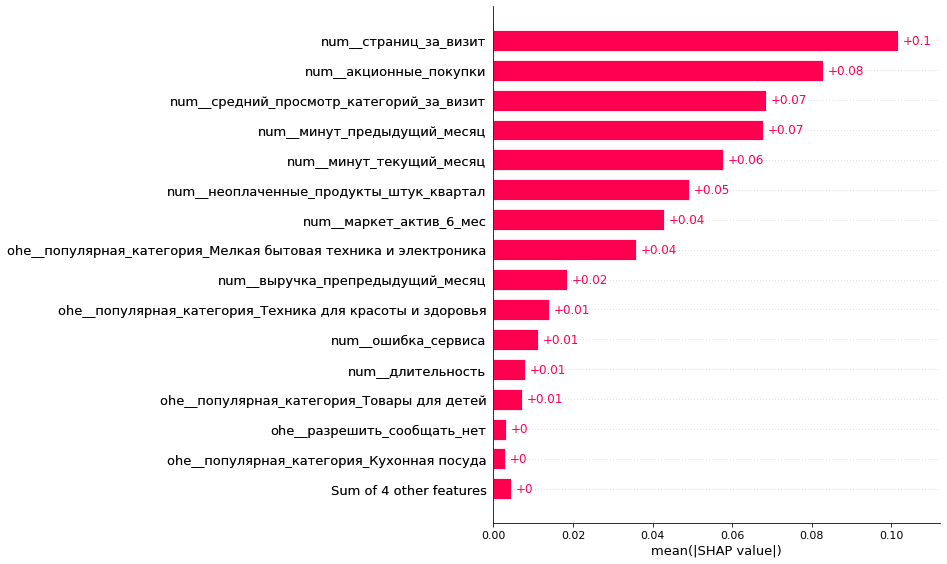

In [49]:
X_train_p = pd.DataFrame(randomized_search.best_estimator_.steps[0][1].fit_transform(X_train),
                        columns = randomized_search.best_estimator_.steps[0][1].get_feature_names_out())
X_test_p = pd.DataFrame(randomized_search.best_estimator_.steps[0][1].transform(X_test),
                        columns = randomized_search.best_estimator_.steps[0][1].get_feature_names_out())
model = randomized_search.best_estimator_.steps[1][1]
X_shap = X_test_p.sample(100)
explainer = shap.Explainer(model.predict, X_shap)
shape_values = explainer(X_shap)
shap.plots.bar(shape_values, max_display =16)

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> ~~Препроцессоры можно обучать только на обучающих данных.\
Тестовую выборки только трансформируем.~~</font>

<br/>
<div class="alert alert-info">
исправлено
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Препроцессор и классификатор в `randomized_search.best_estimator_` уже обученные.</font>

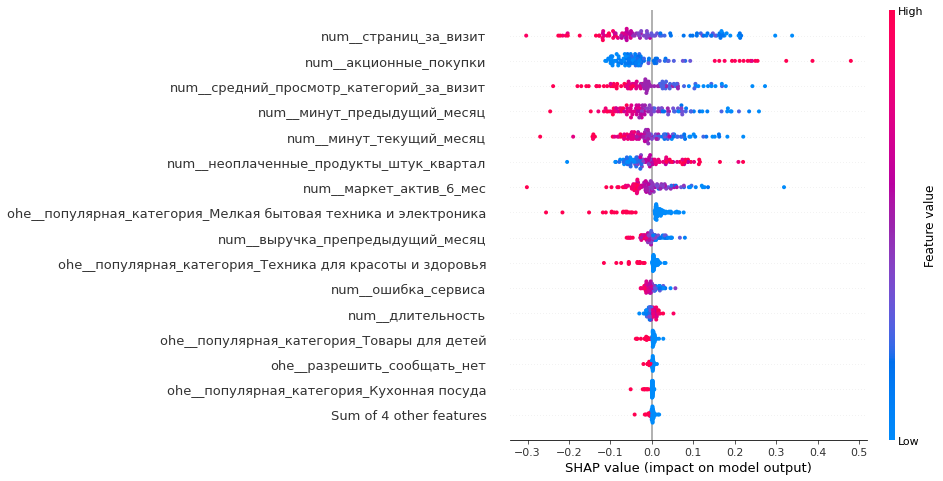

In [50]:
shap.plots.beeswarm(shape_values, max_display =16)

Для того чтобы определить то, какие признаки, в целом, являются наиболее важными для прогнозов, выдаваемых моделью, можно использовать столбчатую диаграмму (shap.plots.bar), отражающую результаты усреднения SHAP‑значений по всем наблюдениям.  Для расчёта средних берут значения Шепли по модулю, чтобы положительные и отрицательные значения не сводили друг друга к нулю.

Диаграмма shap.plots.beeswarm — это полезный инструмент, позволяющий визуализировать все SHAP‑значения для каждого признака. Диаграмма shap.plots.beeswarm может помочь в выявлении важных взаимоотношений между признаками и прогнозами модели.Исследуя SHAP‑значения на этой диаграмме, мы можем начать понимать природу взаимоотношений между признаками и спрогнозированными ценами домов. Например, в случае с признаком "неоплаченные продукты штук квартал", видно, что SHAP‑значения растут по мере роста значения признака. Это указывает на то, что более высокие значения признака соответствуют более высокой спрогнозированой покупательской активности.

Топ 5 важных признаков: страниц за визит,минут в предылущем месяце, акционные покупки, средний просмотр категорий за визит,  минуты в текущем месяце.

Из наименее значимых признаков можно выделить: разрешить сообщать

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

## Шаг 8. Сегментация покупателей

8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 

Проведите графическое и аналитическое исследование группы покупателей.

Сделайте предложения по работе с сегментом для увеличения покупательской активности.

8.3 Сделайте выводы о сегментах:

какой сегмент вы взяли для дополнительного исследования,

какие предложения вы сделали и почему.


Объединим данные Таблицы, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении и Таблицы с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

In [51]:
# объединим данные 
m_all = m_all.merge(m, on='ид', how='left')
# проверим пропуски
m_all.isna().sum()

ид                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
прибыль                                0
dtype: int64

In [52]:
m_all.head()

,ид,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12,10,4.16
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8,13,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11,13,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8,11,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10,10,3.95


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

создадим новый дф, в котором объединим вероятности снижения покупательской активности для тестовых и тренирвочных данных.  Индексом нового дф установим ид клиентов.

По ид клиента объединим новый дф и дф со всеми данными, теперь там будет новый столбец - снижение_активности, значением которого является вероятность снижения активности.

In [53]:
y_probas = pd.DataFrame(np.concatenate((y_train_probas[:, 1], y_test_probas[:, 1]), axis=0))
y_probas.shape

(1296, 1)

In [54]:
y_probas = y_probas.set_index(pd.concat([y_train, y_test]).index)
y_probas.head()

,0
510,0.056909
13,0.531029
536,0.060415
1216,0.745919
367,0.818702


In [55]:
y_probas.rename(columns  = {0: 'снижение_активности'}, inplace=True)
y_probas

,снижение_активности
510,0.056909
13,0.531029
536,0.060415
1216,0.745919
367,0.818702
...,...
81,0.965528
885,0.045316
368,0.873533
793,0.201358


In [56]:
m_all = m_all.merge(y_probas, left_index=True, right_index=True, how='inner')
print(m_all.shape)
display(m_all.head())


(1292, 19)


,ид,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль,снижение_активности
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8,13,3.13,0.872100
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11,13,4.87,0.338062
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8,11,4.21,0.760975
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10,10,3.95,0.945722
5,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксессуары,2,3,7,2,4503.0,5869.6,11,12,3.62,0.666406


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

Попробуем вести работу с признаком акционные покупки

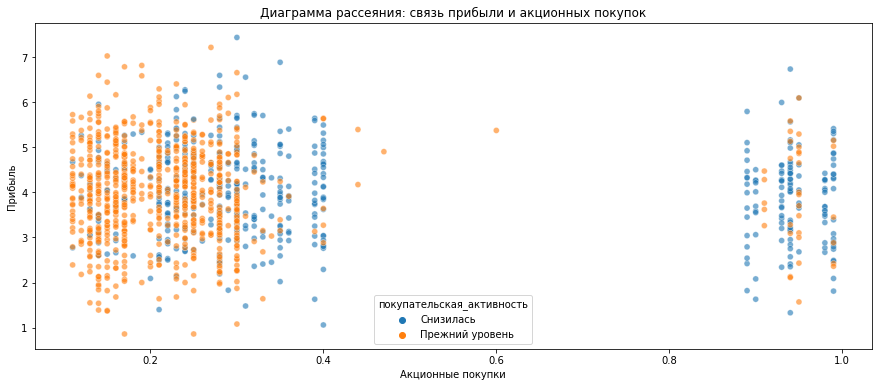

In [57]:
plt.figure(figsize=(15,6))       
sns.scatterplot(data=m_all, y='прибыль', x='акционные_покупки', 
                hue='покупательская_активность', alpha=0.6)        
plt.title('Диаграмма рассеяния: связь прибыли и акционных покупок')
plt.xlabel('Акционные покупки')
plt.ylabel('Прибыль')
plt.show()

Как и на шаге исследователського анализа мы видим, что признак акционные покупки будто разделен на 2 категории. есть ряд покупателей которые покупают почти все по скидке и ряд покупателей чьи акционные покупки составляют 0,15 - 0,4.

Видим, что у покупателей, чья активность снизилась фигурируют акционные покупки.

В качестве границы можем выбрать порог = 0,5

Выберем для себя след сегмент: покупатель с низкой активностью, чьи акционны покупкки более 0,6

In [58]:
segment = m_all.query('снижение_активности>0.5 and акционные_покупки>0.6')
segment.shape

(113, 19)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

С помощью круговых диаграмм проаналируем сегмент

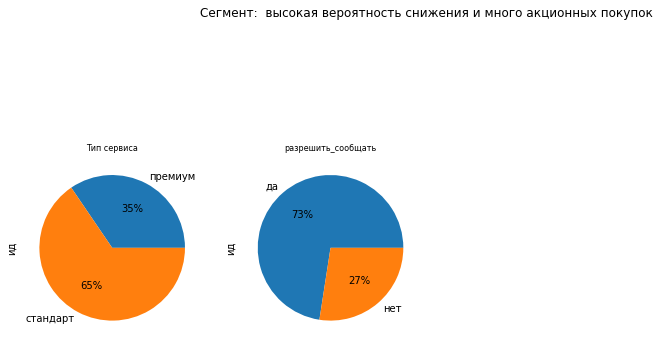

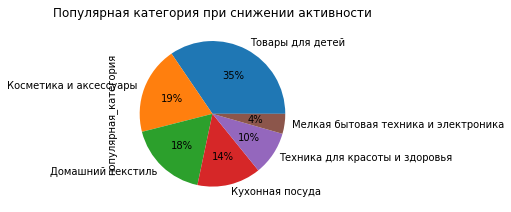

In [59]:
plt.figure(figsize=[15, 7])
plt.suptitle('Сегмент:  высокая вероятность снижения и много акционных покупок')
plt.subplot(1,4,1)
segment.groupby(['тип_сервиса'])['ид'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Тип сервиса', fontsize= 8 )
plt.subplot(1,4,2)
segment.groupby(['разрешить_сообщать'])['ид'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('разрешить_сообщать', fontsize= 8 )
plt.figure(figsize=[15, 20])
plt.subplot(1,4,3)
segment['популярная_категория'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Популярная категория при снижении активности')
plt.show()


Чтобы понять рынок возможно нам стоит посмотреть и другие категории покупателя(вне сегмента). что такого происходит у тех, кто поддерживает покупательскую способность.

Отберем данные по условиям: редко покупает по акции(менее 0.6), прежняя активность и высокая выручка. Звучит как идеальный клиент:)

In [60]:
good_segment = m_all.query('снижение_активности<0.5 and акционные_покупки>0.6 and прибыль>прибыль.mean()')
good_segment.shape

(26, 19)

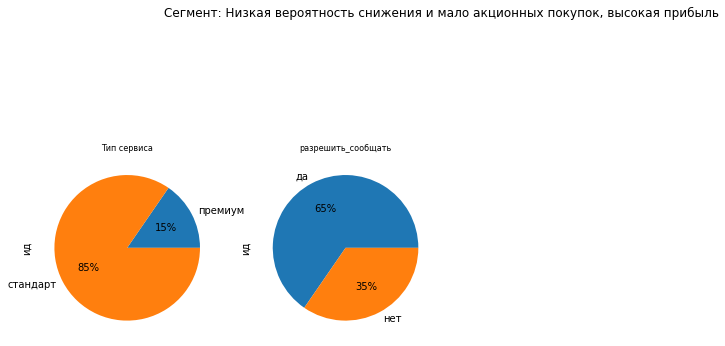

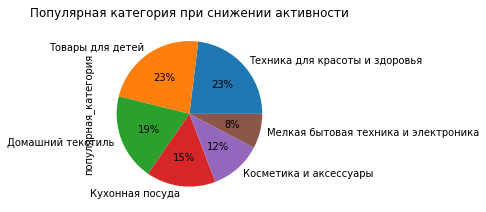

In [61]:
plt.figure(figsize=[15, 7])
plt.suptitle('Сегмент: Низкая вероятность снижения и мало акционных покупок, высокая прибыль')
plt.subplot(1,4,1)
good_segment.groupby(['тип_сервиса'])['ид'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Тип сервиса', fontsize= 8 )
plt.subplot(1,4,2)
good_segment.groupby(['разрешить_сообщать'])['ид'].sum().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('разрешить_сообщать', fontsize= 8 )
plt.figure(figsize=[15, 20])
plt.subplot(1,4,3)
good_segment['популярная_категория'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Популярная категория при снижении активности')
plt.show()

Вывод: 
       мы отобрали покупателей в сегмент по признаку акционных покупок. Этот признак является важным согласно полученным shap графикам, а также у нас есть четкое разделение этого признака (ранее в иссл анализе - это два пика)
   из полученных графиков мы видим, что покупатели со  высокой веротяностью снизить активность чаще использует сервис премиум, возможно сервис как-то не оправдал себя или не представляет особой выгоды.сталкиваются с ошибками сервиса (возможно потому что меньше времени проводят), также лидером среди товаров является - детские товары, в свою очередь "хороший сегмент" часто покупает как детские товары, так и товары для детей
 
    
    

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

## Шаг 9. Общий вывод

В рамках проекта была проделана большая работа по изучению данных, связанных с покупками на маркете. Я применила все знания и умения, полученные в ходе спринта.

Для начала я открыла файлы с данными и ознакомилась с ними: узнала сколько строк и столбцов, какие типы данных есть, посмотрела на описательную статистику по данным(describe).

На следующем шаге шла подготовка данных к анализу: переименование столбцов, обработка пропусков, дублей, замена типов данных.(Были исправлены опечатки в категориальных значениях столбцов (например, тип сервиса стандартт исправлен н стандарт) все столбцы были переведены в нижний регистр, использована кириллица и нижнее подчеркивание между словами)

Я разделила данные на количественные и категориальные и построила графики по этим данным.Большинство данных имеют нормальное рспределение. Был выявлен и устранен выброс в столбце выручка.

Далее я выделила покупаетелей, совершавших покупки за последние три месяца и  объединила таблицы market_file.csv, market_money.csv, market_time.csv для удобства дальнейшего анализа.

Для корреляционного анализа я использовала новый изученный функционал - phik_matrix. Мы нашли мультиколинеарность и устранили ее.  Из графиа увидели, что сильная связь целевого прризнака наблюдается с признаками страниц за визит и минут в предыдущем месяце.

Далее я перешла к построению пайплайна, что позволило многое авторматизировать: организовывать подготовку данных, подбирать методы масштабирования и модели, перебирать  гиперпараметры.Я  Обучила четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). И лучшие результаты показала модельLogisticRegression(C=3, penalty='l1', random_state=42,solver='liblinear') с метрикой roc-auc 0.92 на тренировочной и 0.89 на тестовой

Далее с помощью  shap графиков я оценила важность признаков и их влияние на прогноз модели. Согласно полученным результатам: Топ 5 важных признаков: страниц за визит,минут в предылущем месяце, акционные покупки, средний просмотр категорий за визит,  минуты в текущем месяце.

Из наименее значимых признаков можно выделить: ошибка сервиса, тип сервиса

В шаге по сегментации клиентов я объединила данные клиентов, совершивших покупки за три месяца с табличкой money (прибыль). И в качестве разделения на сегменты выбрала признак - акционные. Я построила круговые диаграммы для проблемного и "идеального" для маркета сегмента.

У Покупатели с снижением активности среди покупок лидируют детские товаы
 
   
   Для того, чтобы затормозить снижение бизнесу необходимо удержать покупателя подольше за просмотром страниц. Варианты для повышения активности: 
   * пересмотреть работу сервиса премиум (среди них вероятность снизить активность выше)
   * показывать клиенту скидки на его популярные категории (в данном случае это детские товары и косметика)
   * обеспечить клиенту небольшую индивидуальную скидку или бонусы (так как видим что многие покупатели с снижением активности предпочитают только товары по скидке)
   * при согласии пользователя и наличия средств на рекламу вставлять контекстную рекламу на другие ресурсы (юзер зашел в яндекс почту и между письмами видит, предложение с скидкой на мягкого медведя)
   * у снижающих активностей много товаров, которые неоплачены - предложить скидку на них или промокод
   * выделить небольшой промокод для любимой категории клиента
   * при наличии многих неоплаченных товаров разнообразить способы оплаты (возможно клиент выбрал товар в нашем маркете, но купил в другом, ведь оказалось что там есть рассрочка)
   * предложить более выгодную цену за подписку на сервис (как минимум будет прибыль с клиента за оплату подписки)




<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Ольга, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>


<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'> Ольга, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>